In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = '10334-1.csv'

# load model
with open('../nn_output/model.json', 'r') as json_file:
    model_json = json_file.read()
model = tf.keras.models.model_from_json(model_json) 
model.load_weights('../nn_output/model_checkpoint.h5')

with open('../nn_output/feature_scaler.pickle', 'rb') as handle:
    scalerx = pickle.load(handle)


2023-09-06 11:04:03.244363: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
# read df
df = pd.read_csv(file)

# clean df
df = df.drop_duplicates(subset='id', keep='last') # remove multiple patient records
df = df.dropna(inplace=False, subset='value')

# get raw values
data = df.value.values

# outlier removal
data = data[(data >= np.quantile(data, 0.01)) & (data <= np.quantile(data, 0.99))]

# standardize
mn = data.mean()
std = data.std()
data = (data-mn)/std

# feature extraction
inpt = np.quantile(data, np.linspace(0, 1, 500))

# feature scaling
inpt = scalerx.transform(inpt.reshape(1, -1));


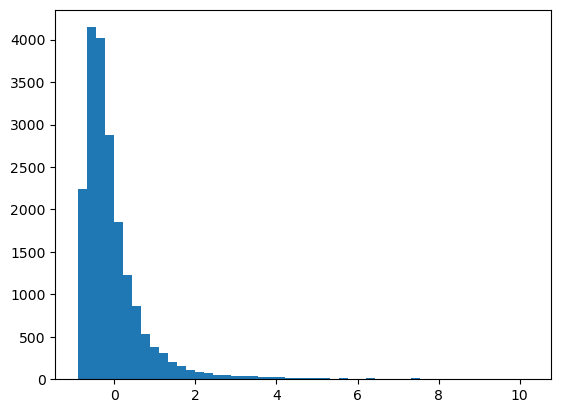

In [3]:
plt.hist(data, 50);


In [4]:
# predict
p = model.predict(inpt)[0]
p *= std
p += mn
p


1/1 [==============================] - 0s 105ms/step


array([ 2.3841343, 30.169561 ], dtype=float32)

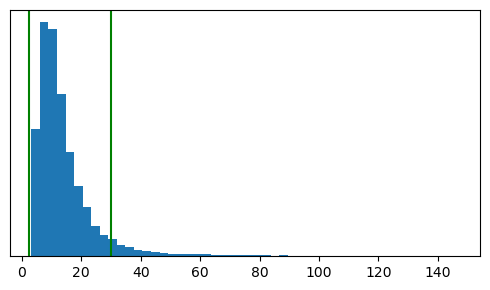

In [5]:
data_orig_scale = (data*std)+mn
plt.figure(figsize=(5,3))
plt.hist(data_orig_scale, 50, density=True);
plt.axvline(p[0], c='g')
plt.axvline(p[1], c='g')
plt.gca().set_yticks([])
    
plt.gcf().patch.set_facecolor('white')
plt.gcf().tight_layout()
